In [7]:

import numpy as np
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer

# Tworzenie przykładowych danych tekstowych
texts = ['This is an hell sentence',
         'Another good sentence here',
         'rgtrgtrtrfd what a sentence here',
         'Another example wew love it',
         'rerewgffdgfdg fuck it the ',
         'Another nice one bla ',
         'Another wewe stupid idiot']
target = [1, 0, 1, 0, 1, 0, 1]
# Użycie CountVectorizer do zamiany tekstów na wektory cech
vectorizer = CountVectorizer()
vectors = vectorizer.fit_transform(texts).toarray()

print(vectors)
print(vectors.shape)

# Konwersja wektorów na tensor i zdefiniowanie warstwy Embedding
inputs = tf.keras.layers.Input(shape=(vectors.shape[1],))
# embedding = tf.keras.layers.Embedding(input_dim=vectors.shape[1], output_dim=8, input_length=vectors.shape[1])(inputs)

# Zdefiniowanie modelu i trenowanie go na przykładowych danych
model = tf.keras.Sequential([
    # inputs,
    tf.keras.layers.Embedding(input_dim=vectors.shape[0], output_dim=vectors.shape[1], weights=[vectors], input_length=10, trainable=False),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='mse')
model.fit(vectors, target, epochs=10, batch_size=32)

[[1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0]
 [0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1]
 [0 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0]]
(7, 23)


ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})

In [9]:
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split

texts = ['This is an hell sentence',
         'Another good sentence here',
         'rgtrgtrtrfd what a sentence here',
         'Another example wew love it',
         'rerewgffdgfdg fuck it the ',
         'Another nice one bla ',
         'Another wewe stupid idiot']
target = [1, 0, 1, 0, 1, 0, 1]

tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=100, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)
sequence = tokenizer.texts_to_sequences(texts)
padded_sequence = tf.keras.preprocessing.sequence.pad_sequences(sequence, maxlen=5, padding='post')

train_inputs, val_inputs, train_targets, val_targets = train_test_split(padded_sequence
                                                                        , target
                                                                        , test_size=0.5
                                                                        , random_state=42)
print(train_inputs)

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=100, output_dim=8, input_length=5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(train_inputs, train_targets, epochs=10, batch_size=32)


[[17 18  5 19  0]
 [ 2 14 15 16  5]
 [ 2 23 24 25  0]]


ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, (<class 'list'> containing values of types {"<class 'int'>"})

In [3]:
from sklearn.metrics import accuracy_score, f1_score
from libs.simpleplotter import simple_roc

val_pred = model.evaluate(val_inputs)

print(val_targets)
print(val_pred)

# print('Val Accuracy: ', accuracy_score(val_targets, val_pred))
# print('Val F1: ', f1_score(val_targets, val_pred))

# print('For Sincere: ', model.predict(vectorizer.transform(sincere_df.question_text.values[:10])))
# print('For Insincere: ', model.predict(vectorizer.transform(insincere_df.question_text.values[:10])))
simple_roc(val_targets, val_pred)



1/1 [==============================] - 0s 83ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
[1 0 1 0]
[0.0, 0.0]


2023-02-10 15:13:58.228583: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


ValueError: Found input variables with inconsistent numbers of samples: [4, 2]

In [17]:
import tensorflow as tf
import numpy as np
from libs.simpleplotter import simple_roc

# przygotowanie danych - zdania i odpowiadające im etykiety
sentences = ['This is an hell sentence',
         'Another good sentence here',
         'rgtrgtrtrfd what a sentence here',
         'Another example wew love it',
         'rerewgffdgfdg fuck it the ',
         'Another nice one bla ',
         'Another wewe stupid idiot']
labels = np.array([1, 0, 1, 0, 1, 0, 1])


# konwersja zdań na ciągi znaków numerycznych
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

# ustalenie długości najdłuższego zdania
max_length = max([len(seq) for seq in sequences])

# wypadnięcie krótszych zdań do długości najdłuższego zdania
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length)
padded_sequences = np.array(padded_sequences)

print(padded_sequences)

# zdefiniowanie modelu z warstwą Embedding
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1000, output_dim=16, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# kompilacja modelu
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# trenowanie modelu
history = model.fit(padded_sequences, labels, epochs=10)

# przygotowanie danych do ewaluacji
test_sentences = [["This is a positive sentence"], ["This is a negative sentence"]]
test_labels = np.array([1, 0])
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_length)
test_padded_sequences = np.array(test_padded_sequences)

# ewaluacja modelu na danych testowych
test_loss, test_accuracy = model.evaluate(test_padded_sequences, test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# simple_roc(val_targets, val_pred)


[[ 5  6  7  8  2]
 [ 0  1  9  2  3]
 [10 11 12  2  3]
 [ 1 13 14 15  4]
 [ 0 16 17  4 18]
 [ 0  1 19 20 21]
 [ 0  1 22 23 24]]
Epoch 1/10


2023-02-10 15:34:16.905709: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 1s 1s/step - loss: 0.6973 - accuracy: 0.2857
Epoch 2/10
1/1 [==============================] - 0s 42ms/step - loss: 0.6926 - accuracy: 0.4286
Epoch 3/10
1/1 [==============================] - 0s 48ms/step - loss: 0.6880 - accuracy: 0.8571
Epoch 4/10
1/1 [==============================] - 0s 26ms/step - loss: 0.6837 - accuracy: 1.0000
Epoch 5/10
1/1 [==============================] - 0s 54ms/step - loss: 0.6795 - accuracy: 1.0000
Epoch 6/10
1/1 [==============================] - 0s 35ms/step - loss: 0.6756 - accuracy: 1.0000
Epoch 7/10
1/1 [==============================] - 0s 30ms/step - loss: 0.6718 - accuracy: 1.0000
Epoch 8/10
1/1 [==============================] - 0s 17ms/step - loss: 0.6681 - accuracy: 1.0000
Epoch 9/10
1/1 [==============================] - 0s 35ms/step - loss: 0.6644 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 210ms/step - loss: 0.6933 - accuracy: 0.5000
Test Loss: 0.6933311223983765
Test Accura

2023-02-10 15:34:18.565142: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


In [19]:
import tensorflow as tf
import numpy as np
from libs.simpleplotter import simple_roc

# przygotowanie danych - zdania i odpowiadające im etykiety
sentences = ['This is an hell sentence',
             'Another good sentence here',
             'rgtrgtrtrfd what a sentence here',
             'Another example wew love it',
             'rerewgffdgfdg fuck it the ',
             'Another nice one bla ',
             'Another wewe stupid idiot']
labels = np.array([1, 0, 1, 0, 1, 0, 1])


# konwersja zdań na ciągi znaków numerycznych
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=1000)
tokenizer.fit_on_texts(sentences)
sequences = tokenizer.texts_to_sequences(sentences)

# ustalenie długości najdłuższego zdania
max_length = max([len(seq) for seq in sequences])

# wypadnięcie krótszych zdań do długości najdłuższego zdania
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length)
padded_sequences = np.array(padded_sequences)

print(padded_sequences)

rnn_units = 32
dropout=0.2

# zdefiniowanie modelu z warstwą Embedding
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1000, output_dim=16, input_length=max_length),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=rnn_units,
                                                       return_sequences=True,
                                                       dropout=dropout,
                                                       kernel_initializer=tf.keras.initializers.he_normal())),
    tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(rnn_units, activation='relu')),
    tf.keras.layers.Dense(units=rnn_units, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# kompilacja modelu
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# trenowanie modelu
history = model.fit(padded_sequences, labels, epochs=10)

# przygotowanie danych do ewaluacji
test_sentences = [["This is a positive sentence"], ["This is a negative sentence"]]
test_labels = np.array([1, 0])
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(test_sequences, maxlen=max_length)
test_padded_sequences = np.array(test_padded_sequences)

# ewaluacja modelu na danych testowych
test_loss, test_accuracy = model.evaluate(test_padded_sequences, test_labels)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# simple_roc(val_targets, val_pred)

[[ 5  6  7  8  2]
 [ 0  1  9  2  3]
 [10 11 12  2  3]
 [ 1 13 14 15  4]
 [ 0 16 17  4 18]
 [ 0  1 19 20 21]
 [ 0  1 22 23 24]]


ValueError: Input 0 of layer "bidirectional" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 80)

In [4]:
import tensorflow as tf
import numpy as np
from tensorflow import keras
import pandas as pd
import nltk
import time
from sklearn.model_selection import train_test_split

start = time.time()

data_dir = './input'
train = data_dir + '/train.csv'
test = data_dir + '/test.csv'

# sub_df = pd.read_csv(sample)
test_df = pd.read_csv(test)
raw_df = pd.read_csv(train)
df_size = len(raw_df)

SAMPLE_SIZE = int(df_size * 0.01)
sample_df = raw_df.sample(SAMPLE_SIZE, random_state=42)
sentences = sample_df.question_text
labels = np.array(sample_df.target)

nltk.download('punkt')
nltk.download('stopwords')
stop_words = nltk.corpus.stopwords.words('english')

def remove_stop_words(sentence):
    return [word for word in sentence if word not in stop_words]

# usuwanie stop words z naszych danych
sentences = [remove_stop_words(sentence) for sentence in sentences]

# tokenizacja danych
tokenizer = tf.keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(sentences)
sequences = np.array(tokenizer.texts_to_sequences(sentences))

# zerowanie długości sekwencji do maksymalnej długości
max_length = max([len(seq) for seq in sequences])
padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, maxlen=max_length)
vocab_size = len(tokenizer.word_index) + 1

# stratify
train_inputs, val_inputs, train_targets, val_targets = train_test_split(padded_sequences
                                                                        , labels
                                                                        , test_size=0.5
                                                                        , random_state=42)
test_inputs, val_inputs, test_targets, val_targets = train_test_split(val_inputs
                                                                        , val_targets
                                                                        , test_size=0.5
                                                                        , random_state=42)


model = keras.Sequential([
    tf.keras.layers.Embedding(input_dim=vocab_size, output_dim=8, input_length=max_length),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(train_inputs, train_targets, epochs=3)

val_loss, val_accuracy = model.evaluate(val_inputs, val_targets)
print("Validation Loss: {:.4f}".format(val_loss))
print("Validation Accuracy: {:.4f}".format(val_accuracy))

print("--- %s seconds ---" % (time.time() - start))


[nltk_data] Downloading package punkt to /Users/kkepins-
[nltk_data]     macwro_1/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/kkepins-
[nltk_data]     macwro_1/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/var/folders/r3/hdngxsmd2vq391vqv6kg6f7w0000gq/T/ipykernel_4838/3896403774.py:38: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sequences = np.array(tokenizer.texts_to_sequences(sentences))


Epoch 1/3


2023-02-13 16:21:38.454224: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 16:21:38.645829: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 16:21:38.660881: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 16:21:39.481767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 16:21:39.499002: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


205/205 [==============================] - 30s 127ms/step - loss: 0.2567 - accuracy: 0.9358
Epoch 2/3
205/205 [==============================] - 23s 114ms/step - loss: 0.2307 - accuracy: 0.9397
Epoch 3/3
205/205 [==============================] - 21s 103ms/step - loss: 0.2184 - accuracy: 0.9397


2023-02-13 16:22:51.745560: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 16:22:51.897193: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 16:22:51.912057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - 8s 60ms/step - loss: 0.2367 - accuracy: 0.9302
Validation Loss: 0.2367
Validation Accuracy: 0.9302
--- 86.44854617118835 seconds ---


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

test_pred = model.predict(test_inputs)

# false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(test_targets, test_pred)

# ROC (AUC)
roc_auc = auc(fpr, tpr)

# narysuj wykres ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [5]:

import time

start = time.time()
import tensorflow as tf

# # przykładowe dane wejściowe (zdania) i etykiety (wartości binarne)
# sentences = ["I love ice cream", "I hate exams", "I feel happy today", "I am sad", "I am not feeling well"]
# labels = [1, 0, 1, 0, 0]
#
# # tokenizacja danych wejściowych
# tokenizer = tf.keras.preprocessing.text.Tokenizer()
# tokenizer.fit_on_texts(sentences)
# sequences = tokenizer.texts_to_sequences(sentences)
#
# # uzupełnienie sekwencji danych do stałej długości
# padded_sequences = tf.keras.preprocessing.sequence.pad_sequences(sequences, padding='post')

# definicja modelu z jedną warstwą GRU i warstwą wyjściową
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=64),
    tf.keras.layers.GRU(units=32, return_sequences=False),
    tf.keras.layers.Dense(units=1, activation='sigmoid')
])

# kompilacja modelu
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# trenowanie modelu
model.fit(padded_sequences, labels, epochs=10, validation_split=0.2)

print("--- %s seconds ---" % (time.time() - start))


Epoch 1/10


2023-02-13 16:43:26.118785: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 16:43:26.255460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 16:43:27.218437: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


327/327 [==============================] - ETA: 0s - loss: 0.2746 - accuracy: 0.9310

2023-02-13 16:43:53.501356: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 16:43:53.549235: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


327/327 [==============================] - 33s 86ms/step - loss: 0.2746 - accuracy: 0.9310 - val_loss: 0.2388 - val_accuracy: 0.9361
Epoch 2/10
327/327 [==============================] - 25s 77ms/step - loss: 0.2375 - accuracy: 0.9354 - val_loss: 0.2313 - val_accuracy: 0.9361
Epoch 3/10
327/327 [==============================] - 25s 76ms/step - loss: 0.2290 - accuracy: 0.9354 - val_loss: 0.2254 - val_accuracy: 0.9361
Epoch 4/10
327/327 [==============================] - 25s 76ms/step - loss: 0.2280 - accuracy: 0.9354 - val_loss: 0.2235 - val_accuracy: 0.9361
Epoch 5/10
327/327 [==============================] - 24s 75ms/step - loss: 0.2254 - accuracy: 0.9354 - val_loss: 0.2245 - val_accuracy: 0.9361
Epoch 6/10
327/327 [==============================] - 25s 76ms/step - loss: 0.2268 - accuracy: 0.9354 - val_loss: 0.2230 - val_accuracy: 0.9361
Epoch 7/10
327/327 [==============================] - 26s 79ms/step - loss: 0.2255 - accuracy: 0.9354 - val_loss: 0.2216 - val_accuracy: 0.9361
Epo

103/103 [==============================] - 4s 35ms/step - loss: 0.2390 - accuracy: 0.9302
Validation Loss: 0.2390
Validation Accuracy: 0.9302


2023-02-13 16:48:18.105858: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2023-02-13 16:48:18.150450: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


103/103 [==============================] - 4s 34ms/step


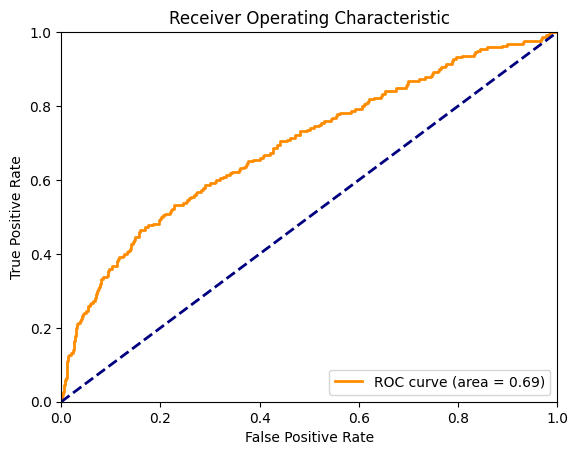

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

val_loss, val_accuracy = model.evaluate(val_inputs, val_targets)
print("Validation Loss: {:.4f}".format(val_loss))
print("Validation Accuracy: {:.4f}".format(val_accuracy))

test_pred = model.predict(test_inputs)

# false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(test_targets, test_pred)

# ROC (AUC)
roc_auc = auc(fpr, tpr)

# narysuj wykres ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
